# **EDA**

In [95]:
#Se importan librerías necesarias

import pandas as pd
import seaborn as sns
from langdetect import detect

## - Coursera

Se importan inicialmente los dos archivos con información de la plataforma Coursera para analizar su contenido y evaluar la posibilidad de unificarlos.

In [99]:
coursera_courses = pd.read_csv('Coursera_courses.csv')
coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [96]:
coursera_reviews = pd.read_csv('Coursera_reviews.csv')
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [97]:
# Se eliminan duplicados
coursera_reviews.drop_duplicates(inplace=True)

Ya que en el dataset había muchas Reviews y Ratings por cada curso, se decidió obtener el promedio de ratings y el conteo total de reviews (por curso), y agregar dos columna con esa información.

In [365]:
mean_rating = pd.DataFrame(coursera_reviews.groupby(['course_id']).rating.agg('mean').sort_values(ascending=False))
mean_rating.rename(columns={'rating':'rating_mean'}, inplace=True)
mean_rating.head()

,rating_mean
course_id,
building-modern-python-applications-on-aws,5.000
entreprise-changement-climatique,5.000
remote-team-management,5.000
removing-barriers-to-change,5.000
legaltech,4.968


In [366]:
reviews_count = pd.DataFrame(coursera_reviews.groupby(['course_id']).reviews.count())
reviews_count.rename(columns={'reviews':'reviews_count'}, inplace=True)
reviews_count.head()

,reviews_count
course_id,
aboriginal-education,67
access-control-sscp,45
accounting-analytics,468
accounting-data-analytics-python,8
actualizacion-manejo-diabetes-tipo-2,253


Se unificó la información obtenida en el paso anterior con la información de los cursos en una sola tabla.

In [367]:
coursera_full = ((coursera_courses.join(mean_rating, on='course_id')).join(reviews_count, on='course_id'))
coursera_full

,name,institution,course_url,course_id,rating_mean,reviews_count
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.739923,12677.0
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.816438,1460.0
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.929504,8199.0
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.767482,12054.0
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.818182,33.0
...,...,...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python,3.500000,8.0
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,4.607843,408.0
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach,4.734043,282.0
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution,NaN,NaN


In [368]:
#Se eliminan columnas innecesarias
coursera_full.drop(['course_url','course_id'], axis=1,inplace=True)

Debido a que en la solicitud de trabajo se especificaba segmentar por idioma, se utilizó la librería **langdetect** para detectar el idioma del nombre de los cursos.

In [369]:
coursera_full['language'] = coursera_full['name'].apply(detect)
coursera_full.head()

,name,institution,rating_mean,reviews_count,language
0,Machine Learning,Stanford University,4.739923,12677.0,en
1,Indigenous Canada,University of Alberta,4.816438,1460.0,id
2,The Science of Well-Being,Yale University,4.929504,8199.0,en
3,Technical Support Fundamentals,Google,4.767482,12054.0,de
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,4.818182,33.0,en


Como se observa en la respuesta obtenida en el paso anterior, en los índices 1 y 3 el idioma es inglés, sin embargo, la librería lo detectó diferente; por ello, se decidió hacer una verificación manual de los idiomas atribuídos.

In [373]:
coursera_full['language'].value_counts()

en    522
es     25
fr     14
de     13
it     12
ca      7
tl      5
ru      5
no      4
ro      3
nl      3
da      3
id      2
pt      2
lt      1
af      1
pl      1
Name: language, dtype: int64

In [454]:
# Correr esta celda antes y después del replace para verificar el cambio
coursera_full[coursera_full['language'] == 'es']

,name,institution,rating_mean,reviews_count,language
38,Primeros Auxilios Psicológicos (PAP),Universitat Autònoma de Barcelona,4.870597,2697.0,es
110,Contabilidad para no contadores,Universidad Nacional Autónoma de México,4.763168,2525.0,es
122,Camino a la Excelencia en Gestión de Proyectos,Pontificia Universidad Católica de Chile,4.564368,1740.0,es
143,Cursos en línea: modelo para armar,Universidad Nacional Autónoma de México,4.896552,58.0,es
175,Nutrición y obesidad: control de sobrepeso,Universidad Nacional Autónoma de México,4.789232,1523.0,es
233,Competencias digitales. Herramientas de ofimát...,Universitat Autònoma de Barcelona,4.785586,1110.0,es
268,Negociación exitosa: Estrategias y habilidades...,University of Michigan,4.818182,715.0,es
292,Introducción a la programación en Python I: Ap...,Pontificia Universidad Católica de Chile,4.205155,970.0,es
310,Gestión Empresarial Exitosa para Pymes,Pontificia Universidad Católica de Chile,4.856009,1764.0,es
328,Fundamentos de Excel para Negocios,Universidad Austral,4.806400,1250.0,es


In [425]:
coursera_full['language'].replace(to_replace='pl',value='en',inplace=True)

In [457]:
# Se cambia el código de idioma por el nombre completo.
coursera_full['language'].replace(to_replace=['en','es','fr','ru','pt'], value=['Inglés','Español','Francés','Ruso','Portugués'], inplace=True)

Después de la verificación se obtuvieron 5 idiomas diferentes en el dataset.

<AxesSubplot: >

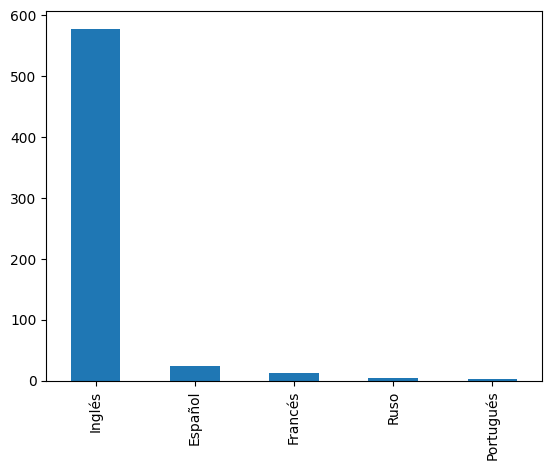

In [458]:
coursera_full['language'].value_counts().plot(kind='bar')

In [459]:
# Se exporta el CSV para su utilización en Power BI
coursera_full.to_csv('coursera_full.csv')

Finalmente se obtuvieron algunas visualizaciones para el ánalisis de datos.

<AxesSubplot: xlabel='rating'>

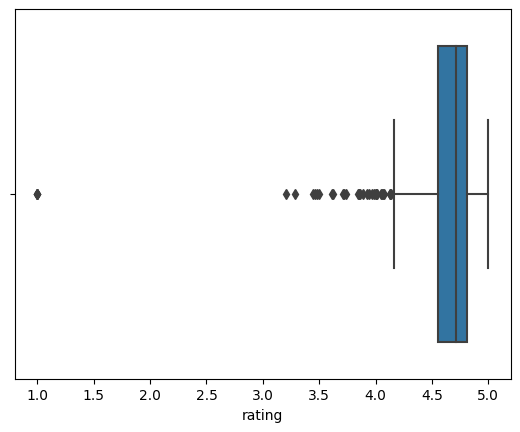

In [141]:
sns.boxplot(x='rating', data=coursera_full)

In [142]:
coursera_full['rating'].describe()

count    604.000000
mean       4.619780
std        0.394290
min        1.000000
25%        4.551803
50%        4.717742
75%        4.814681
max        5.000000
Name: rating, dtype: float64

<AxesSubplot: xlabel='reviews'>

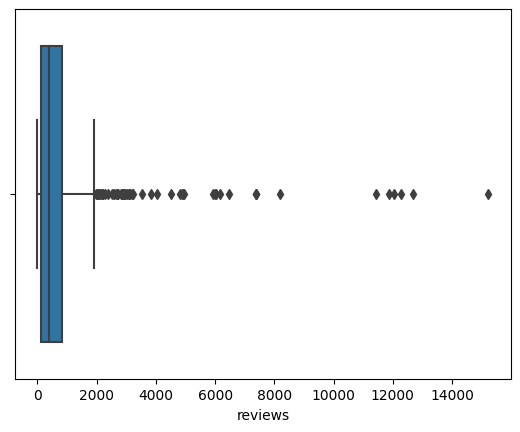

In [143]:
sns.boxplot(x='reviews', data=coursera_full)

In [144]:
coursera_full['reviews'].describe()

count      604.000000
mean       860.746689
std       1608.474817
min          1.000000
25%        132.750000
50%        387.000000
75%        847.750000
max      15226.000000
Name: reviews, dtype: float64

In [101]:
coursera_courses['institution'].value_counts().head(10)

University of Pennsylvania                    43
University of Michigan                        31
Duke University                               24
Google Cloud                                  22
IBM                                           18
Stanford University                           18
University of Illinois at Urbana-Champaign    17
University of Virginia                        17
Yale University                               17
DeepLearning.AI                               16
Name: institution, dtype: int64

<AxesSubplot: xlabel='count', ylabel='institution'>

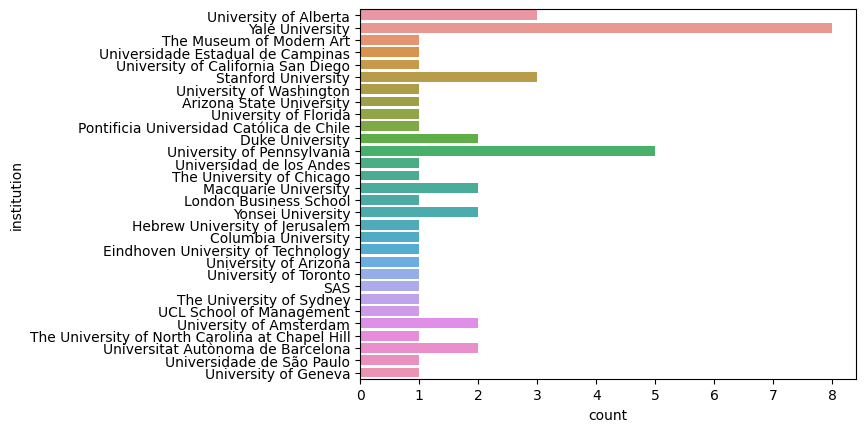

In [145]:
sns.countplot(data = coursera_full[(coursera_full['rating'] > 4.55) & (coursera_full['reviews'] > 132)].sort_values(by=['rating'], 
              ascending=False).head(50), y='institution')

## - Edx

Inicialmente se ingesta el dataset, se obtiene información general de él, se eliminan duplicados y se eliminan columnas innecesarias.

In [460]:
edx_courses = pd.read_csv('edx_courses.csv')

In [461]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [462]:
edx_courses.drop_duplicates(inplace=True)

In [463]:
edx_courses.drop(['summary','instructors','course_description','course_syllabus','course_url'], axis=1,inplace=True)
edx_courses.head()

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length,price
0,How to Learn Online,"124,980",Self-paced on your time,edX,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD
1,Programming for Everybody (Getting Started wit...,"293,864",Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD
2,CS50's Introduction to Computer Science,"2,442,271",Self-paced on your time,Harvard University,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD
3,The Analytics Edge,"129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD
4,Marketing Analytics: Marketing Measurement Str...,"81,140",Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD


In [465]:
edx_courses['n_enrolled'].isna().sum()

120

Se rellenan los campos nulos de la columna 'n_enrolled' para poder cambiar el tipo de dato a entero.

In [468]:
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].fillna('0')
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].str.replace(',', '')
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].astype('int32')

In [469]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 974
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          974 non-null    object
 1   n_enrolled     974 non-null    int32 
 2   course_type    974 non-null    object
 3   institution    974 non-null    object
 4   Level          974 non-null    object
 5   subject        974 non-null    object
 6   language       974 non-null    object
 7   subtitles      971 non-null    object
 8   course_effort  974 non-null    object
 9   course_length  974 non-null    object
 10  price          974 non-null    object
dtypes: int32(1), object(10)
memory usage: 87.5+ KB


Se hace la detección y asignación de idiomas a cada curso, tanto para la columna 'language' como para la columna 'subtitles'.

In [470]:
idiomas = list(edx_courses['language'].unique())
idiomas

['English',
 'Español',
 'Italiano',
 '日本語',
 'Français',
 '中文',
 'Português',
 'اللغة العربية',
 'Deutsch']

In [471]:
lista_idiomas=[]
for i in idiomas:
    idioma = detect(i)
    lista_idiomas.append(idioma)
print (lista_idiomas)

['en', 'es', 'it', 'zh-tw', 'fr', 'zh-cn', 'pt', 'ar', 'de']


**NOTA:** 'zh-tw' y 'zh-cn' son dos variantes diferentes de Chino, pero para fines de este estudio se decidió colocarlas como una sola.

In [472]:
idioma_cambio = ['Inglés','Español', 'Italiano', 'Chino', 'Francés', 'Chino', 'Portugués', 'Árabe', 'Alemán']

In [473]:
edx_courses['language'].replace(to_replace=idiomas, value=idioma_cambio, inplace=True)
edx_courses['subtitles'].replace(idiomas, idioma_cambio, regex=True, inplace=True)

Se observó que todos los cursos ofrecidos por Edx son gratuitos, sin embargo, si se quiere obtener la certificación se debe pagar un costo extra. Por ello se extrajo el valor del certificado en una columna aparte y se eliminó la columna original 'price'.

In [474]:
edx_courses['precio_certificado'] = edx_courses['price'].str.extract('(\d+)')
edx_courses['precio_certificado'] = edx_courses['precio_certificado'].astype('int32')
edx_courses.head()

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length,price,precio_certificado
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,Inglés,Inglés,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,49
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,Inglés,Inglés,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,49
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,Introductory,Computer Science,Inglés,Inglés,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,90
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,Inglés,Inglés,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,199
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,Inglés,Inglés,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,249


In [475]:
edx_courses.drop(['price'], axis=1, inplace=True)
edx_courses.head()

,title,n_enrolled,course_type,institution,Level,subject,language,subtitles,course_effort,course_length,precio_certificado
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,Inglés,Inglés,2–3 hours per week,2 Weeks,49
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,Inglés,Inglés,2–4 hours per week,7 Weeks,49
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,Introductory,Computer Science,Inglés,Inglés,6–18 hours per week,12 Weeks,90
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,Inglés,Inglés,10–15 hours per week,13 Weeks,199
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,Inglés,Inglés,5–7 hours per week,4 Weeks,249


In [480]:
# Se exporta el csv para su uso en Power BI
edx_courses.to_csv('edx_courses_transformado.csv')

Finalmente se obtuvieron algunas visualizaciones para el ánalisis de datos.

<AxesSubplot: xlabel='n_enrolled'>

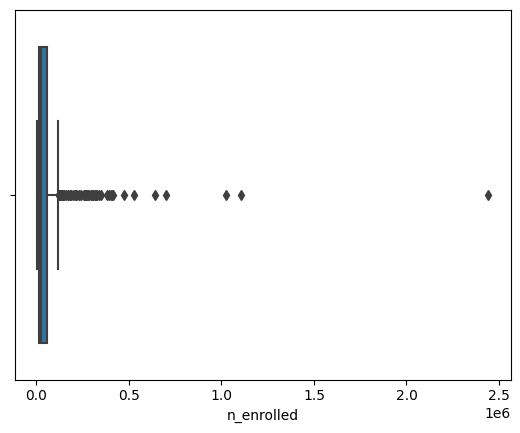

In [311]:
sns.boxplot(data=edx_courses[edx_courses['n_enrolled'] >= 5001], x='n_enrolled')

In [312]:
edx_courses[edx_courses['n_enrolled'] >= 5001].describe()

,n_enrolled,precio_certificado
count,8.540000e+02,854.000000
mean,5.320879e+04,101.642857
std,1.190911e+05,70.640447
min,5.001000e+03,5.000000
25%,1.176425e+04,49.000000
50%,2.411900e+04,79.000000
75%,5.465250e+04,149.000000
max,2.442271e+06,450.000000


<AxesSubplot: xlabel='n_enrolled'>

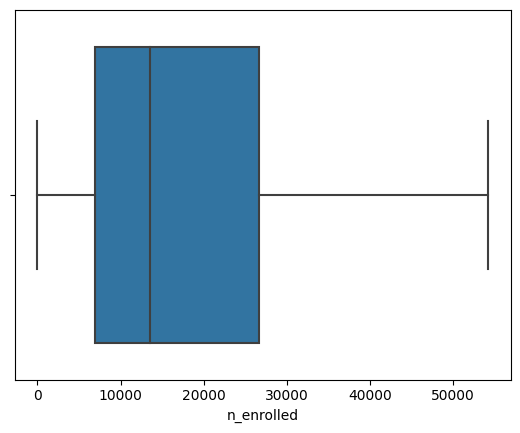

In [313]:
sns.boxplot(data=edx_courses[edx_courses['n_enrolled'] < 54652], x='n_enrolled')

<AxesSubplot: xlabel='n_enrolled', ylabel='Count'>

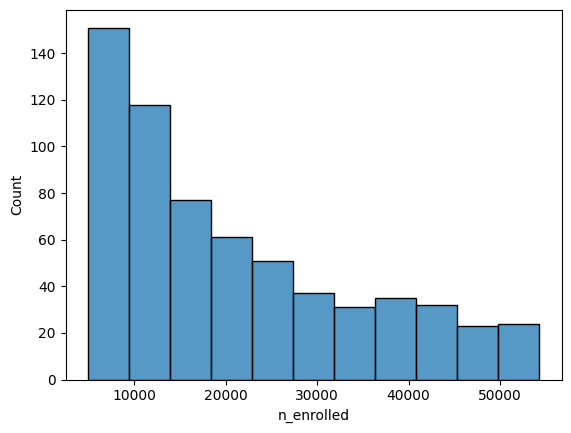

In [314]:
# La mayoría de cursos tienen menos de 10000 inscritos
sns.histplot(data = edx_courses[edx_courses['n_enrolled'].between(5001,54652)], x='n_enrolled')

In [290]:
# Harvard es la universidad que más cursos imparte.
edx_courses['institution'].value_counts()

Harvard University                                                    103
Universitat Politècnica de Valencia                                    47
Massachusetts Institute of Technology                                  41
Delft University of Technology                                         30
IBM                                                                    30
                                                                     ... 
The University of Tokyo                                                 1
Educational Testing Service                                             1
The National University of Singapore                                    1
University of Oxford                                                    1
University of Maryland Global Campus-University System of Maryland      1
Name: institution, Length: 111, dtype: int64

In [34]:
# La Universitat Politècnica de Valencia es la que más cursos de computer Science imparte.
edx_courses.loc[(edx_courses['subject'] == 'Computer Science')]['institution'].value_counts()

Universitat Politècnica de Valencia                                   13
IBM                                                                   10
Stanford University                                                    8
University of California, Berkeley                                     8
The Linux Foundation                                                   8
Harvard University                                                     8
Amazon Web Services                                                    7
Columbia University                                                    7
Curtin University                                                      6
Dartmouth_IMTx-Dartmouth College-IMT                                   6
The World Wide Web Consortium (W3C)                                    5
The Georgia Institute of Technology                                    5
IITBombay                                                              5
University of Washington                           

## - Udemy

Inicialmente se ingesta el dataset, se obtiene información general de él, se eliminan duplicados y se eliminan columnas innecesarias.

In [3]:
udemy_courses = pd.read_csv('udemy_courses.csv')
udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
udemy_courses.drop_duplicates(inplace=True)

In [6]:
udemy_courses.drop(['course_id','url'], axis=1, inplace=True)
udemy_courses.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Se cambia el tipo de dato de la columna 'published_timestamp' para que sea de tipo datetime.

In [7]:
udemy_courses['published_timestamp'] = pd.to_datetime(udemy_courses['published_timestamp'], infer_datetime_format=True)
udemy_courses.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [8]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_title         3672 non-null   object             
 1   is_paid              3672 non-null   bool               
 2   price                3672 non-null   int64              
 3   num_subscribers      3672 non-null   int64              
 4   num_reviews          3672 non-null   int64              
 5   num_lectures         3672 non-null   int64              
 6   level                3672 non-null   object             
 7   content_duration     3672 non-null   float64            
 8   published_timestamp  3672 non-null   datetime64[ns, UTC]
 9   subject              3672 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 290.5+ KB


Se hace la detección y adjudicación del idioma, haciendo verificación manual de los idiomas con menor cuenta.

In [30]:
udemy_courses['language'] = udemy_courses['course_title'].apply(detect)
udemy_courses.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,en
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,en
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,en
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,en
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,en


In [31]:
udemy_courses['language'].value_counts()

en       3040
es        141
de         89
pt         65
ca         57
fr         47
no         45
it         42
ja         30
tl         21
nl         15
ro         13
da         10
af         10
ar          9
sv          7
et          4
id          4
tr          4
zh-cn       4
vi          3
ru          3
th          2
hr          2
pl          2
ko          1
so          1
sw          1
Name: language, dtype: int64

In [88]:
udemy_courses[udemy_courses['language'] == 'ko']

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language
1346,캔바(Canva)로 SNS 콘텐츠 만들기,True,30,44,13,19,Beginner Level,2.0,2017-02-06 21:39:19+00:00,Graphic Design,ko


In [85]:
udemy_courses['language'].replace(to_replace='hr',value='es',inplace=True)

In [89]:
codigo_idioma = list(udemy_courses['language'].unique())
codigo_idioma

['en',
 'it',
 'es',
 'ar',
 'ja',
 'pt',
 'th',
 'fr',
 'pl',
 'ru',
 'zh-cn',
 'tr',
 'ko']

In [90]:
idioma_cambio = ['Inglés', 'Italiano', 'Español', 'Árabe', 'Japonés', 'Portugués', 'Thai', 'Francés', 'Polaco', 'Ruso', 
                'Chino', 'Turco', 'Coreano']

In [91]:
udemy_courses['language'].replace(to_replace=codigo_idioma, value=idioma_cambio, inplace=True)

In [93]:
# Se exporta el csv par su utilización en Power BI
udemy_courses.to_csv('udemy_courses_transformado.csv')

Finalmente se obtuvieron algunas visualizaciones para el ánalisis de datos.

In [342]:
# La mayoría de los cursos en Udemy son de pago
udemy_courses['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

<AxesSubplot: xlabel='num_subscribers'>

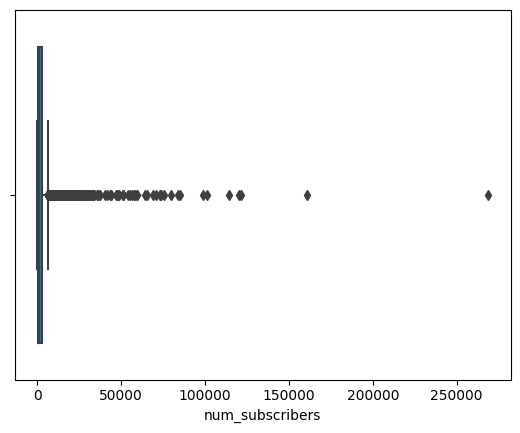

In [9]:
sns.boxplot(data=udemy_courses, x='num_subscribers')

In [10]:
# El 75% de los cursos tiene menos de 2549 suscriptores
udemy_courses['num_subscribers'].describe()

count      3672.000000
mean       3190.586874
std        9488.105448
min           0.000000
25%         111.750000
50%         912.000000
75%        2548.750000
max      268923.000000
Name: num_subscribers, dtype: float64

<AxesSubplot: xlabel='num_subscribers', ylabel='Count'>

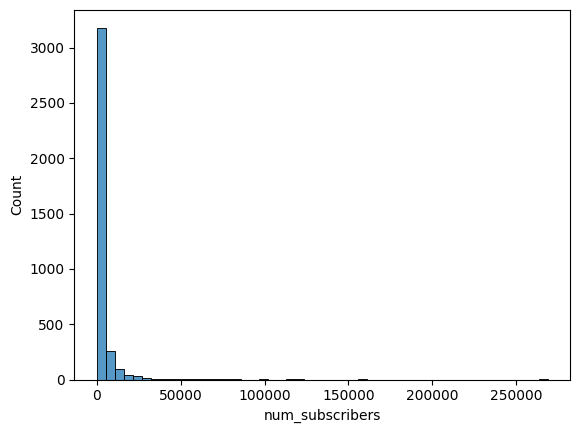

In [18]:
sns.histplot(data=udemy_courses, x='num_subscribers', bins=50)

In [107]:
udemy_courses.sort_values(by='num_subscribers', ascending=False).head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language
2827,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,Inglés
3032,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,Inglés
3230,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,Inglés
2783,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,Inglés
3232,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,Inglés


In [345]:
udemy_courses['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

<AxesSubplot: >

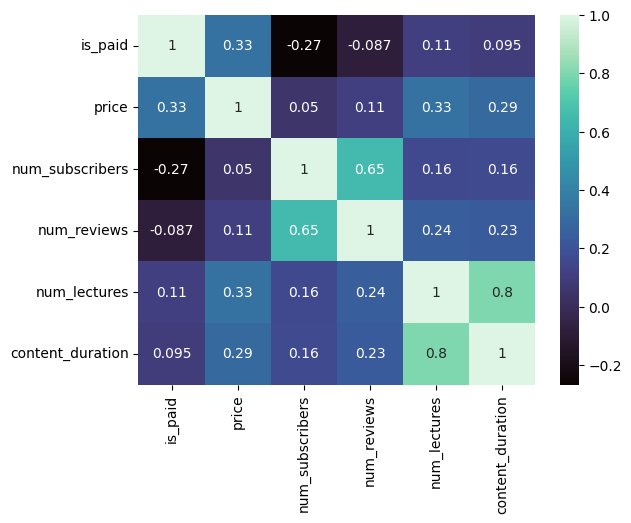

In [351]:
# Se observa una ligera correlación negativa entre el número de suscriptores y que el curso sea de pago o no.
sns.heatmap((udemy_courses.corr(numeric_only=True)), annot=True,cmap='mako')

<AxesSubplot: xlabel='content_duration'>

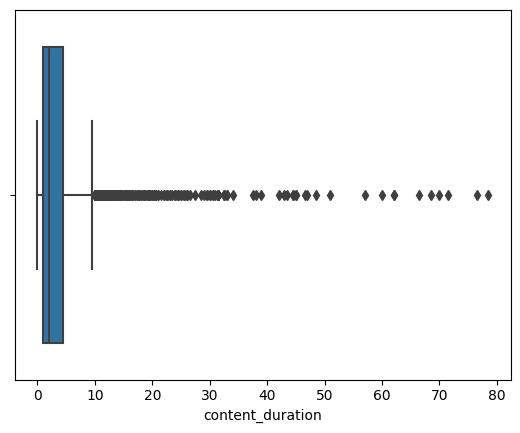

In [24]:
sns.boxplot(data=udemy_courses, x='content_duration')

In [23]:
udemy_courses['content_duration'].describe()

count    3672.000000
mean        4.097603
std         6.057830
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64